In [97]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from tqdm.notebook import tqdm, trange

In [98]:
price_folder = "data/stocknet-dataset/price/raw"
tweet_folder = "data/stocknet-dataset/tweet/preprocessed"

symbols = np.sort(os.listdir(tweet_folder))
print(symbols, len(symbols))

['AAPL' 'ABB' 'ABBV' 'AEP' 'AGFS' 'AMGN' 'AMZN' 'BA' 'BABA' 'BAC' 'BBL'
 'BCH' 'BHP' 'BP' 'BRK-A' 'BSAC' 'BUD' 'C' 'CAT' 'CELG' 'CHL' 'CHTR'
 'CMCSA' 'CODI' 'CSCO' 'CVX' 'D' 'DHR' 'DIS' 'DUK' 'EXC' 'FB' 'GD' 'GE'
 'GOOG' 'HD' 'HON' 'HRG' 'HSBC' 'IEP' 'INTC' 'JNJ' 'JPM' 'KO' 'LMT' 'MA'
 'MCD' 'MDT' 'MMM' 'MO' 'MRK' 'MSFT' 'NEE' 'NGG' 'NVS' 'ORCL' 'PCG' 'PCLN'
 'PEP' 'PFE' 'PG' 'PICO' 'PM' 'PPL' 'PTR' 'RDS-B' 'REX' 'SLB' 'SNP' 'SNY'
 'SO' 'SPLP' 'SRE' 'T' 'TM' 'TOT' 'TSM' 'UL' 'UN' 'UNH' 'UPS' 'UTX' 'V'
 'VZ' 'WFC' 'WMT' 'XOM'] 87


### Utils

In [99]:
def getDataBySymbol(symbol):
    with open(f"data/processed_data/{symbol}.json", 'r') as fp:
        data = json.load(fp)
    return data

In [100]:
def printProcessedData(symbol):
    data = getDataBySymbol(symbol)
    
    print("#" * 47)
    print("#" * 20 + " INPUT " + "#" * 20)
    print("#" * 47)
    
    for date in data["input"]:
        print(date)
        print("\t", data["input"][date]["price"])
        print("\t Tweets:")
        for tweet in data["input"][date]["tweets"]:
            print("\t\t", tweet[0], tweet[1])
    
    print("#" * 47)
    print("#" * 20 + " TARGET " + "#" * 20)
    print("#" * 47)
    
    for date in data["target"]:
        print(date, data["target"][date]["price"])

In [101]:
printProcessedData("PTR")

###############################################
#################### INPUT ####################
###############################################
2014-01-14
	 103.0
	 Tweets:
		 2014-01-14 $ ptr - asian stocks mixed after us sell-off ; nikkei drops over 2 % -> URL stock stocks stockaction
2014-01-15
	 103.599998
	 Tweets:
2014-01-16
	 103.730003
	 Tweets:
2014-01-17
	 104.349998
	 Tweets:
2014-01-21
	 103.989998
	 Tweets:
2014-01-22
	 103.639999
	 Tweets:
2014-01-23
	 102.449997
	 Tweets:
2014-01-24
	 101.0
	 Tweets:
2014-01-27
	 99.75
	 Tweets:
2014-01-28
	 99.489998
	 Tweets:
2014-01-29
	 97.739998
	 Tweets:
		 2014-01-29 $ ptr - the zacks analyst blog highlights : baidu , sina , petrochina , tal educat ... -> URL stock stocks stockaction
2014-01-30
	 96.980003
	 Tweets:
2014-01-31
	 95.910004
	 Tweets:
2014-02-03
	 96.220001
	 Tweets:
2014-02-04
	 95.0
	 Tweets:
2014-02-05
	 95.620003
	 Tweets:
2014-02-06
	 96.160004
	 Tweets:
2014-02-07
	 97.470001
	 Tweets:
		 2014-02-07 $ ptr inves

	 122.610001
	 Tweets:
2015-04-09
	 128.179993
	 Tweets:
		 2015-04-09 clayton : ptr 128.34 petrochina company limited $ ptr added URL
2015-04-10
	 129.5
	 Tweets:
2015-04-13
	 129.979996
	 Tweets:
2015-04-14
	 127.800003
	 Tweets:
2015-04-15
	 130.009995
	 Tweets:
2015-04-16
	 134.96000700000002
	 Tweets:
		 2015-04-16 new sec filing for $ ptr filed a moment ago : URL URL
2015-04-17
	 132.190002
	 Tweets:
2015-04-20
	 129.300003
	 Tweets:
2015-04-21
	 131.850006
	 Tweets:
2015-04-22
	 131.75
	 Tweets:
2015-04-23
	 130.479996
	 Tweets:
2015-04-24
	 129.630005
	 Tweets:
2015-04-27
	 133.880005
	 Tweets:
2015-04-28
	 131.470001
	 Tweets:
		 2015-04-28 $ ptr - adr shares end mixed ; teva declines URL
		 2015-04-28 $ ptr - report of foreign issuer ( 6 - k ) URL
2015-04-29
	 128.929993
	 Tweets:
2015-04-30
	 128.419998
	 Tweets:
2015-05-01
	 129.070007
	 Tweets:
2015-05-04
	 129.850006
	 Tweets:
2015-05-05
	 129.0
	 Tweets:
2015-05-06
	 127.940002
	 Tweets:
2015-05-07
	 123.519997
	 Tweets:

2017-03-02 75.260002
2017-03-03 75.33000200000001
2017-03-06 75.900002
2017-03-07 75.949997
2017-03-08 75.660004
2017-03-09 73.860001
2017-03-10 73.800003
2017-03-13 73.43
2017-03-14 72.889999
2017-03-15 72.379997
2017-03-16 74.66999799999999
2017-03-17 75.050003
2017-03-20 75.120003
2017-03-21 75.889999
2017-03-22 74.129997
2017-03-23 74.129997
2017-03-24 74.550003
2017-03-27 73.66999799999999
2017-03-28 74.139999
2017-03-29 74.18
2017-03-30 74.41999799999999
2017-03-31 73.360001
2017-04-03 73.349998
2017-04-04 72.949997
2017-04-05 73.730003
2017-04-06 73.059998
2017-04-07 73.489998
2017-04-10 73.690002
2017-04-11 73.379997
2017-04-12 72.559998
2017-04-13 73.0
2017-04-17 72.440002
2017-04-18 72.099998
2017-04-19 71.66999799999999
2017-04-20 71.239998
2017-04-21 70.440002
2017-04-24 71.269997
2017-04-25 70.989998
2017-04-26 70.760002
2017-04-27 70.529999
2017-04-28 70.620003
2017-05-01 70.300003
2017-05-02 70.139999
2017-05-03 69.389999
2017-05-04 68.949997
2017-05-05 67.639999
2017-05

In [102]:
def visualizeProcessedData(symbol):
    data = getDataBySymbol(symbol)
    
    pi = data["input"]
    x_pi = [x for x in pi]
    y_pi = [pi[x]["price"] for x in pi]
    y2_pi = [len(pi[x]["tweets"]) for x in pi]
    
    fig = plt.figure(figsize=(20, 10))
    
    ax1 = fig.add_subplot(111)
    ax1.scatter(x_pi, y_pi, label="price")
    ax1.set_ylabel("Price")
    
    ax2 = ax1.twinx()
    ax2.bar(x_pi, y2_pi, color='green', alpha=0.5, label="# of tweets")
    ax2.set_ylabel("# of Tweets")
    
    ax1.set_xticks(x_pi[::10])
    ax1.set_xticklabels(x_pi[::10], rotation=90)
    ax1.set_xlabel("Date")
    
    plt.legend()
    plt.title("Inputs")
    plt.show()
    
    pt = data["target"]
    x_pt = [x for x in pt]
    y_pt = [pt[x]["price"] for x in pt]
    
    plt.figure(figsize=(20, 10))
    plt.scatter(x_pt, y_pt)
    plt.xlabel("Date")
    plt.xticks(x_pt[::10], rotation=90)
    plt.ylabel("Price")
    plt.title("Targets")
    plt.show()

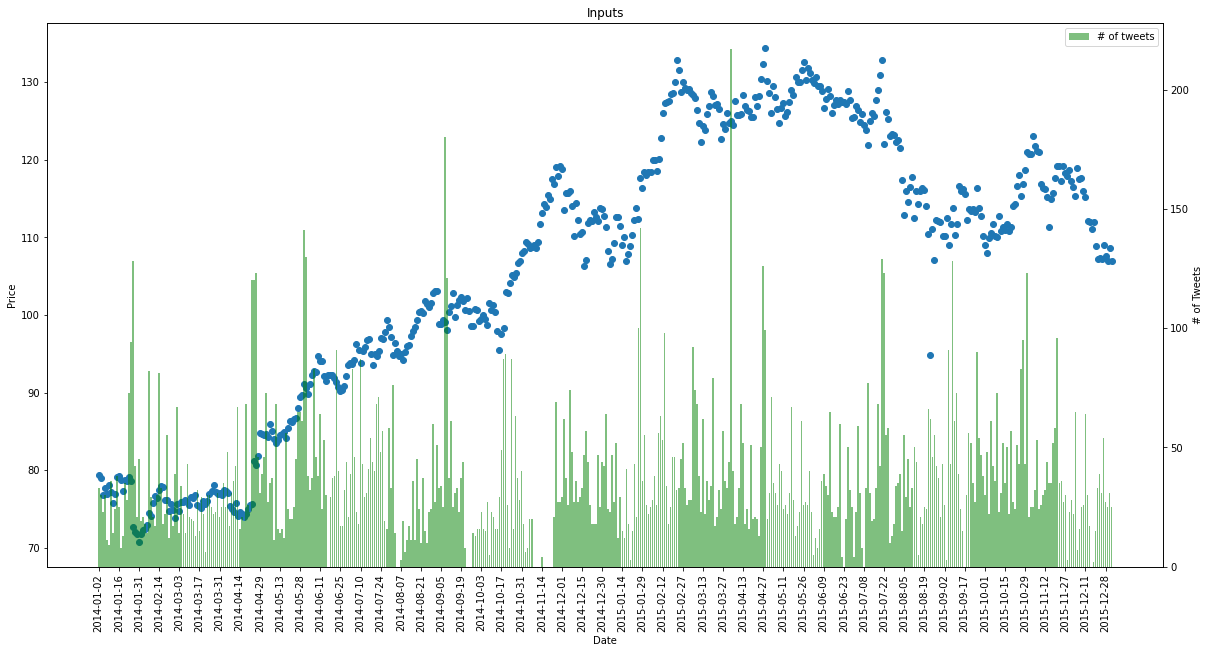

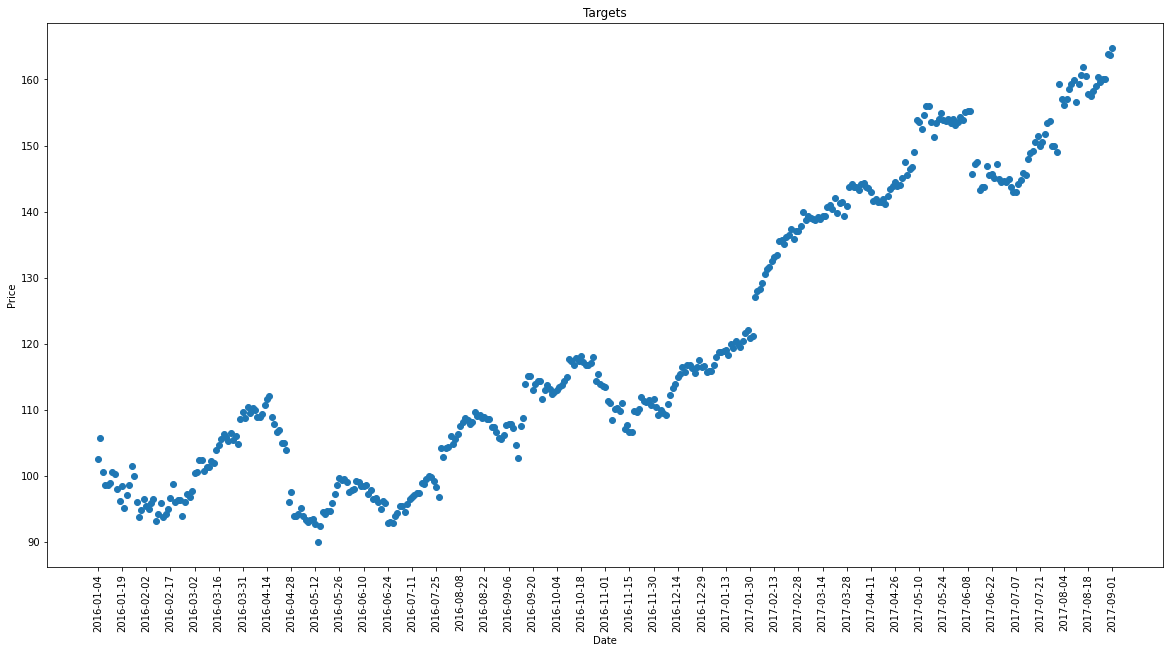

In [103]:
visualizeProcessedData("AAPL")

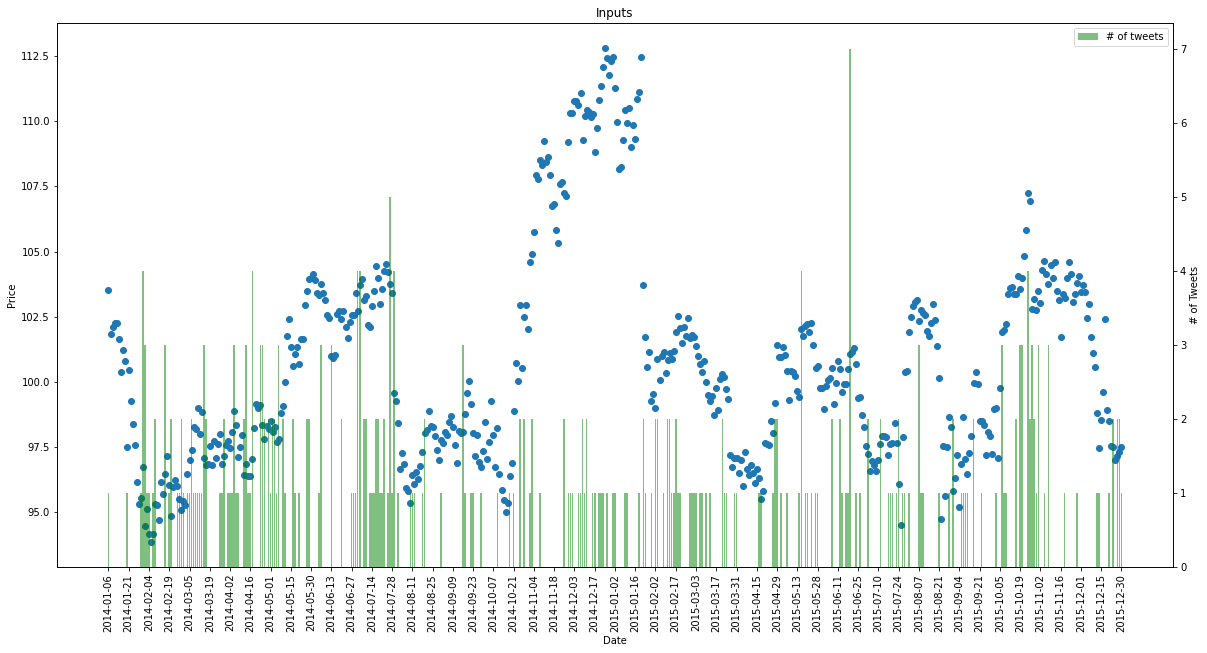

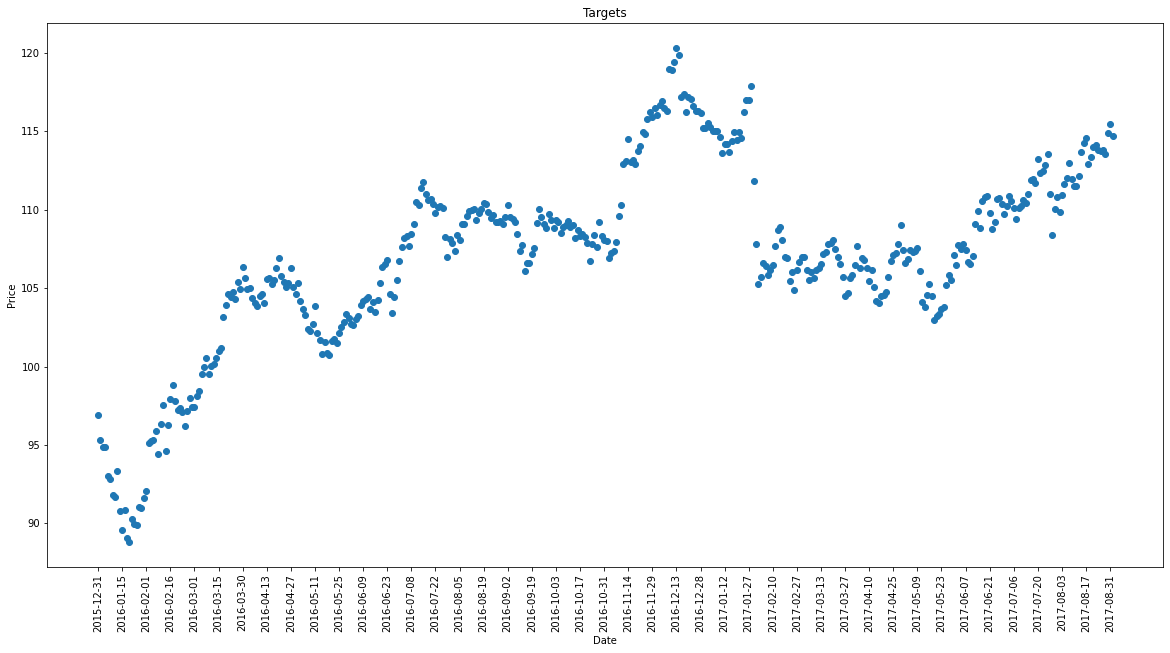

In [104]:
visualizeProcessedData("UPS")

### Train/Val/Test Split by Symbol

In [105]:
np.random.seed(111)

In [106]:
def splitDataBySymbol():
    rand_idx = np.arange(0, 87)
    np.random.shuffle(rand_idx)

    train_symbols = symbols[rand_idx[:58]]
    val_symbols = symbols[rand_idx[58:73]]
    test_symbols = symbols[rand_idx[73:]]
    return train_symbols, val_symbols, test_symbols

In [107]:
train_symbols, val_symbols, test_symbols = splitDataBySymbol()
train_symbols = np.delete(train_symbols, -1)
print(train_symbols, "\n")
print(val_symbols, "\n")
print(test_symbols)

['UPS' 'SO' 'MSFT' 'CVX' 'TM' 'MO' 'CAT' 'D' 'LMT' 'GD' 'BSAC' 'BUD' 'MDT'
 'NEE' 'HON' 'ABBV' 'UL' 'CHL' 'PTR' 'PG' 'UNH' 'SLB' 'CODI' 'AMGN' 'PICO'
 'MCD' 'AEP' 'UTX' 'NGG' 'ABB' 'AAPL' 'DHR' 'BABA' 'ORCL' 'PCG' 'EXC' 'PM'
 'T' 'SRE' 'V' 'MMM' 'SNY' 'BCH' 'PFE' 'TOT' 'C' 'UN' 'SNP' 'PPL' 'HSBC'
 'GE' 'VZ' 'JPM' 'BAC' 'IEP' 'DUK' 'HD'] 

['CMCSA' 'KO' 'MRK' 'BP' 'AMZN' 'CSCO' 'FB' 'MA' 'TSM' 'PEP' 'HRG' 'NVS'
 'CHTR' 'GOOG' 'BRK-A'] 

['DIS' 'RDS-B' 'BBL' 'BHP' 'BA' 'PCLN' 'SPLP' 'INTC' 'REX' 'JNJ' 'CELG'
 'WMT' 'XOM' 'WFC']


### Batch Sampler

In [108]:
def sampleBatch(symbols, time_horizon):
    X_price = list()
    X_tweets = list()
    log_X_dates = list()
    
    Y_price = list()
    log_Y_dates = list()
    
    for symbol in symbols:
        this_X_price = list()
        this_X_tweets = list()
        this_log_X_dates = list()
        
        this_Y_price = list()
        this_log_Y_dates = list()
        
        data = getDataBySymbol(symbol)
        all_dates = np.sort(list(data["input"].keys()))
        try:
            possible_start_dates = all_dates[:-time_horizon]
            start_date = np.random.choice(possible_start_dates)
        except:
            print(symbol)
            print(data)
        
        idx = np.where(all_dates == start_date)[0][0]
        for _ in range(time_horizon):
            date_key = all_dates[idx]
            this_X_price.append(data["input"][date_key]["price"])
            this_X_tweets.append("\n".join([f"[{b}]" for a, b in data["input"][date_key]["tweets"]]))
            this_log_X_dates.append(date_key)
            idx += 1
        
        probe_targets = False
        for _ in range(time_horizon):
            if idx >= len(all_dates):
                probe_targets = True
            else:
                date_key = all_dates[idx]
                this_Y_price.append(data["input"][date_key]["price"])
                this_log_Y_dates.append(date_key)
                idx += 1
        
        if probe_targets:
            idx = 0
            all_dates = np.sort(list(data["target"].keys()))
            for _ in range(time_horizon - len(this_Y_price)):
                date_key = all_dates[idx]
                this_Y_price.append(data["target"][date_key]["price"])
                this_log_Y_dates.append(date_key)
                idx += 1
        
        X_price.append(np.array(this_X_price))
        X_tweets.append(this_X_tweets)
        log_X_dates.append(this_log_X_dates)
        
        Y_price.append(np.array(this_Y_price))
        log_Y_dates.append(this_log_Y_dates)
    
    X_price = np.vstack(X_price)
    Y_price = np.vstack(Y_price)
    return (X_price, X_tweets, log_X_dates), (Y_price, log_Y_dates)

In [109]:
(X_price, X_tweets, log_X_dates), (Y_price, log_Y_dates) = sampleBatch(train_symbols, 10)

In [110]:
print(X_price[0])

[101.489998 102.089996 101.75     102.449997 101.68     101.809998
 101.730003 101.379997 101.       100.669998]


In [111]:
print(Y_price[0])

[100.379997 100.779999 100.        99.510002  99.260002  99.459999
  98.709999  99.769997  98.910004 100.089996]


### Additional Utils

In [116]:
var_map = dict()

for symbol in symbols:
    data = getDataBySymbol(symbol)
    all_prices = [data["input"][d]["price"] for d in data["input"]] + [data["target"][d]["price"] for d in data["target"]]
    var_map[symbol] = np.nanvar(all_prices)

### Method 1: Zero-Order Forecast

In [120]:
def computeZeroOrderLoss(symbols, time_horizon, test_horizons):
    mean_loss = {test_horizon: list() for test_horizon in test_horizons}
    cumulative_mean = {test_horizon: list() for test_horizon in test_horizons}
    norm_var = np.array([var_map[symbol] for symbol in symbols])
    
    for test_step in tqdm(range(1000)):
        (X_price, X_tweets, _), (Y_price, _) = sampleBatch(symbols, time_horizon)

        pred_Y_price = np.mean(X_price, -1)

        for test_horizon in test_horizons:
            actual_Y_price = Y_price[:, test_horizon - 1]

            loss = np.mean(((actual_Y_price - pred_Y_price) ** 2) / norm_var)
            mean_loss[test_horizon].append(loss)
            cumulative_mean[test_horizon].append(np.mean(mean_loss[test_horizon]))

        if (test_step % 100 == 0):
            plt.figure(figsize=(10, 8))
            for test_horizon in cumulative_mean:
                plt.plot(cumulative_mean[test_horizon], label=test_horizon)
            plt.legend()
            plt.show()
    
    print(f"FINAL LOSS (forecast=zero-order, time_horizon={time_horizon})")
    all_loss = dict()
    for test_horizon in mean_loss:
        all_loss[test_horizon] = np.mean(mean_loss[test_horizon])
        print(test_horizon, ":", all_loss[test_horizon])
    
    return all_loss

#### Time Horizon = 10, Test Horizons = (1, 2, 3, 5, 7, 10)

  0%|          | 0/1000 [00:00<?, ?it/s]

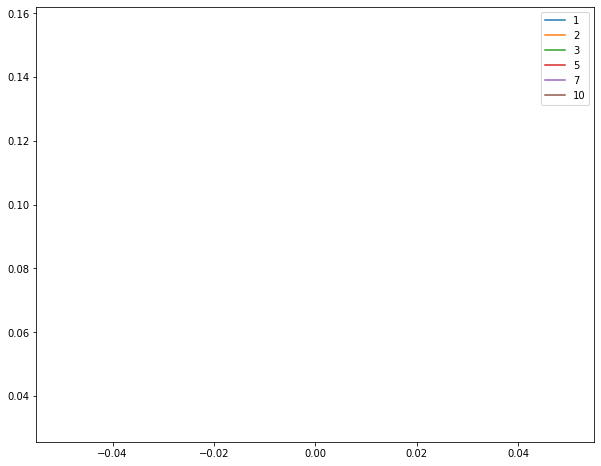

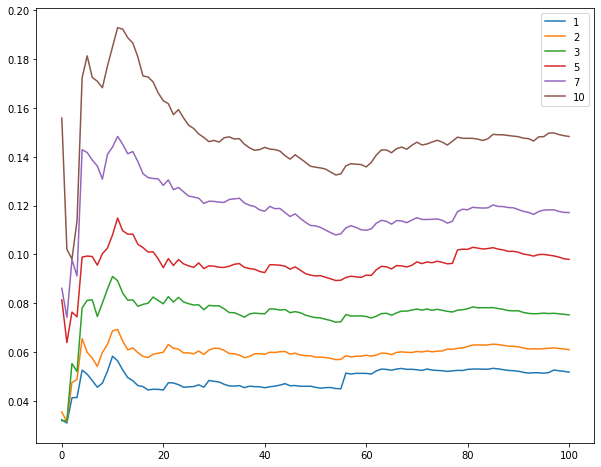

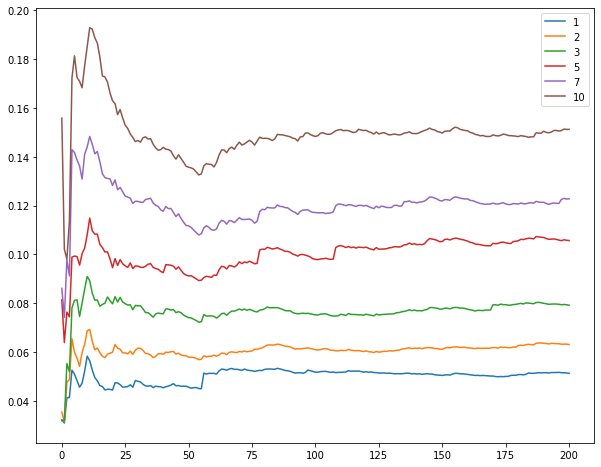

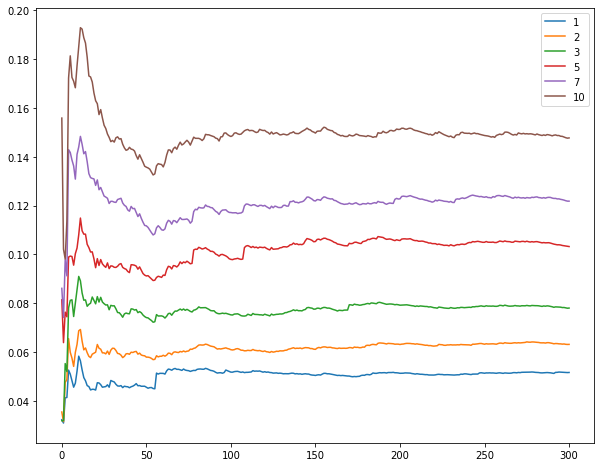

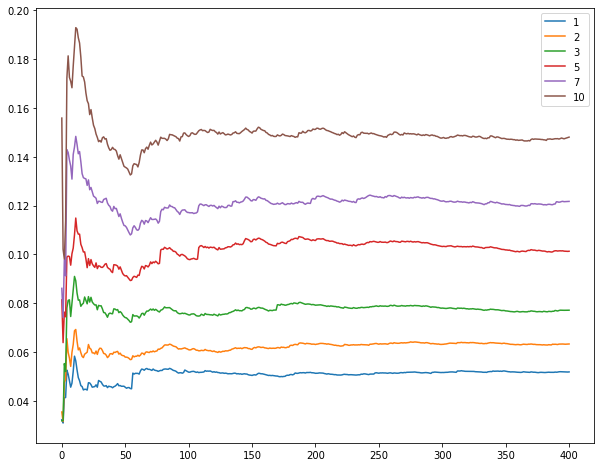

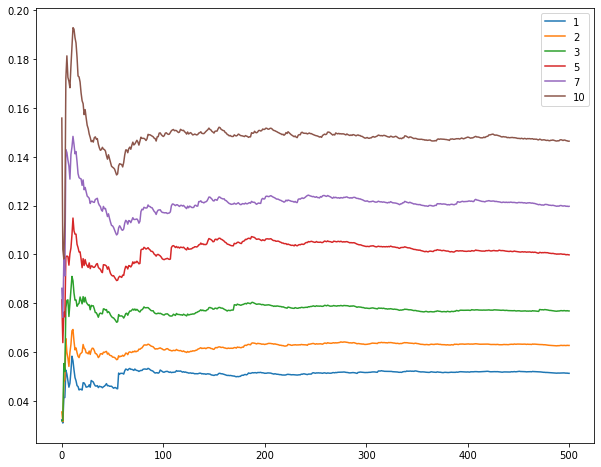

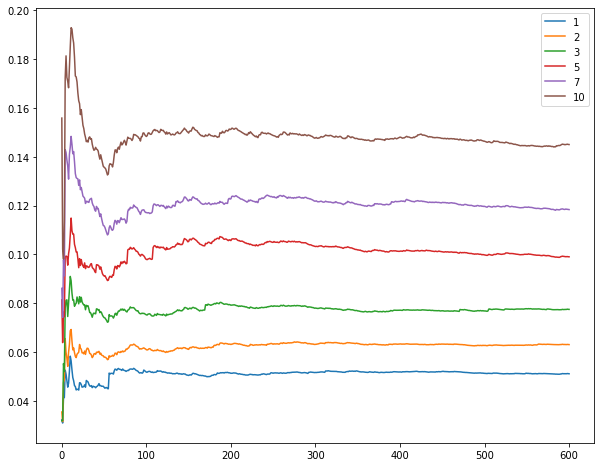

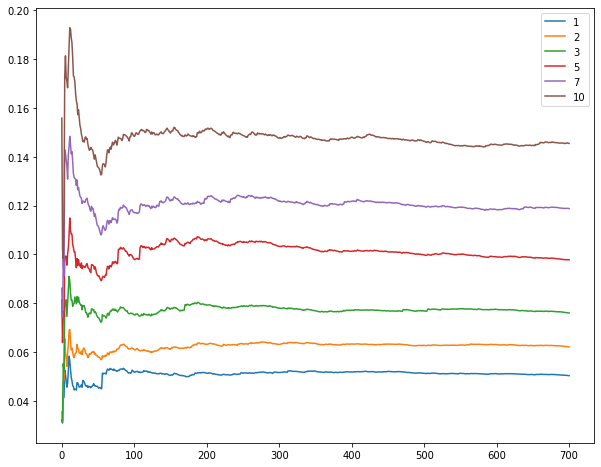

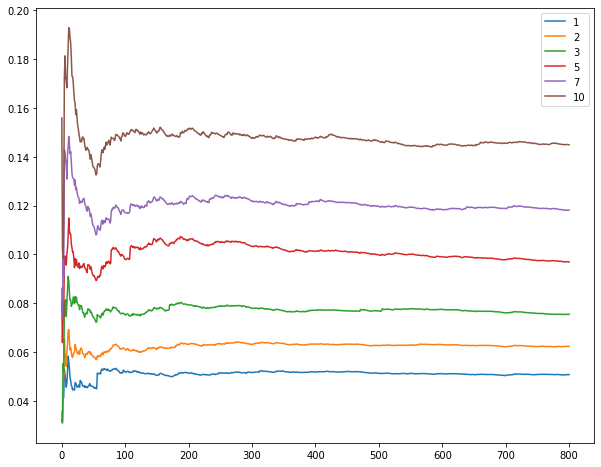

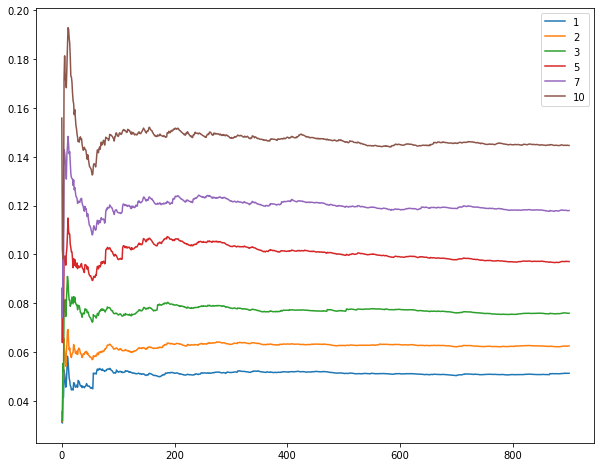

FINAL LOSS (forecast=zero-order, time_horizon=10)
1 : 0.05094335952352324
2 : 0.06237850654725426
3 : 0.07613503911891747
5 : 0.09717047109045063
7 : 0.11760848656932768
10 : 0.14468114184673544


In [121]:
all_loss = computeZeroOrderLoss(test_symbols, 10, [1, 2, 3, 5, 7, 10])

#### Time Horizon = 100, Test Horizons = (1, 5, 10, 25, 50, 75, 100)

  0%|          | 0/1000 [00:00<?, ?it/s]

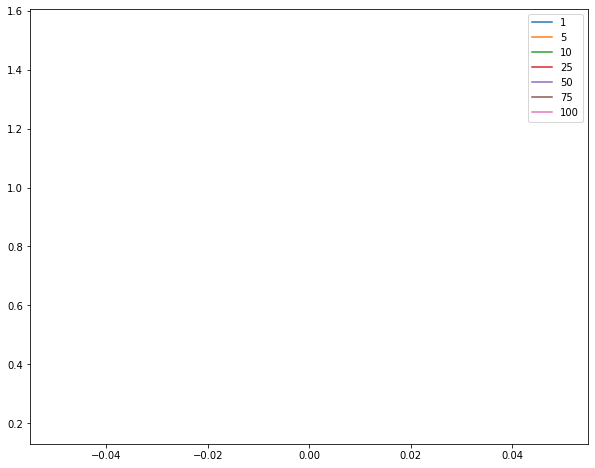

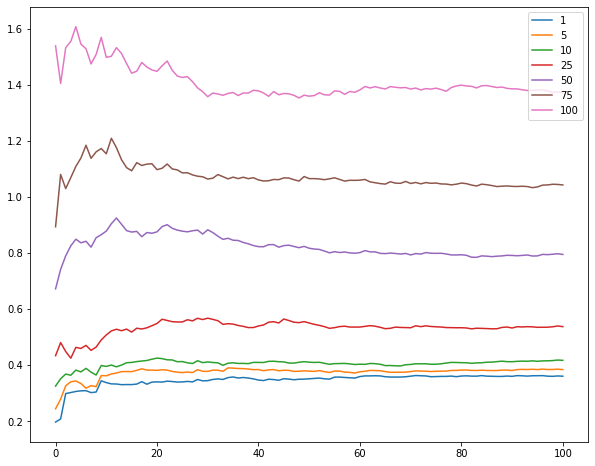

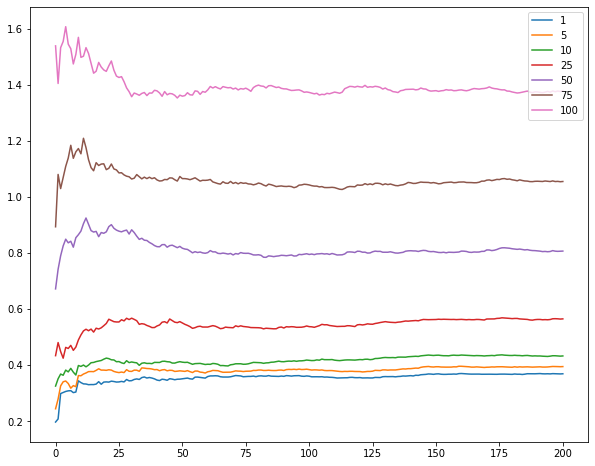

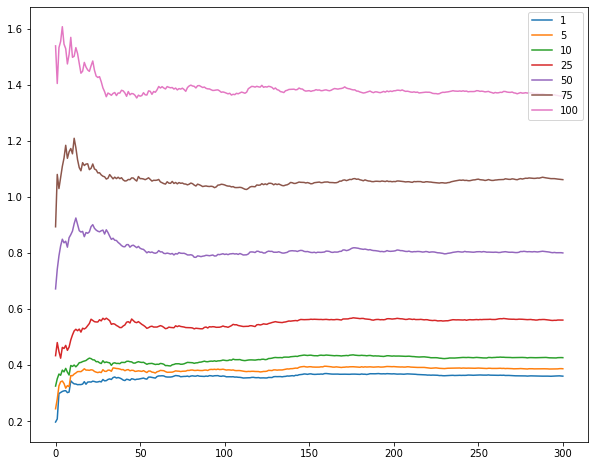

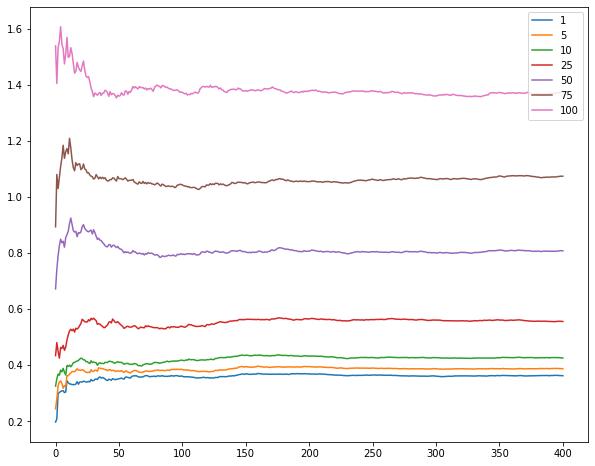

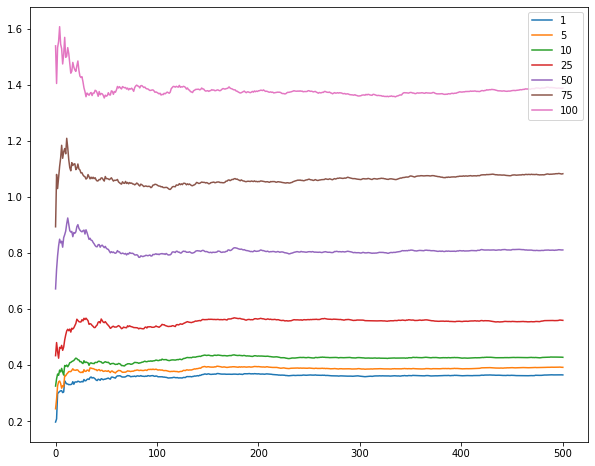

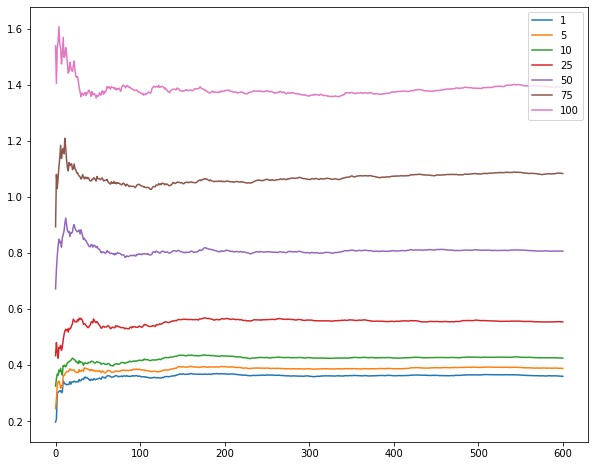

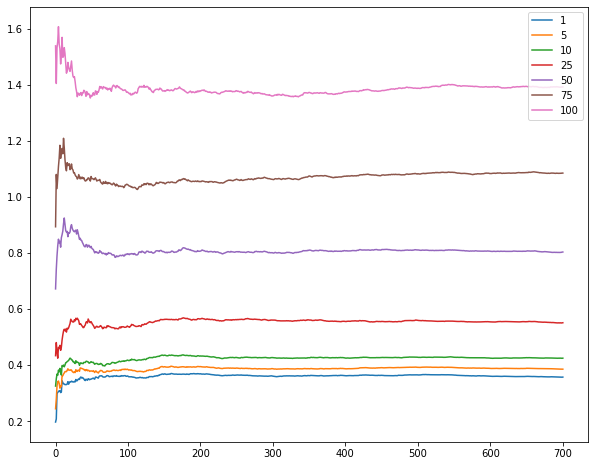

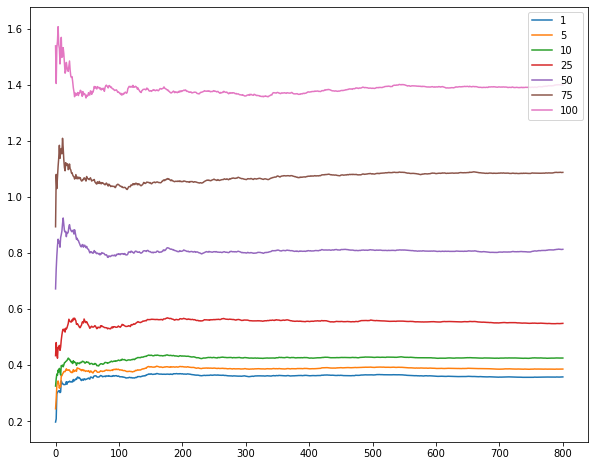

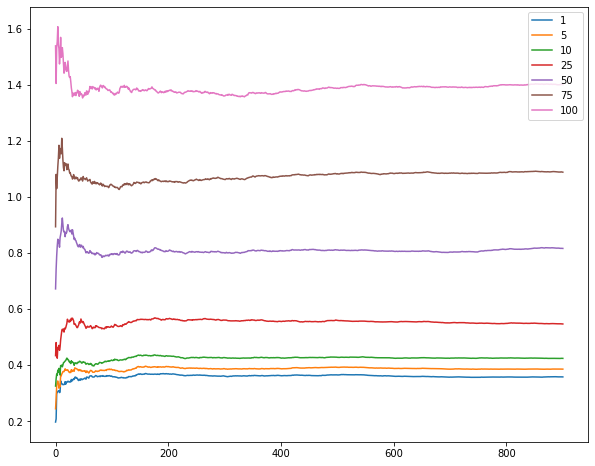

FINAL LOSS (forecast=zero-order, time_horizon=100)
1 : 0.35679737776349507
5 : 0.3847789408229687
10 : 0.42169516762584225
25 : 0.5407978022213277
50 : 0.8072654962594418
75 : 1.0773752234706104
100 : 1.3888103472922861


In [122]:
all_loss = computeZeroOrderLoss(test_symbols, 100, [1, 5, 10, 25, 50, 75, 100])

### Method 2: First-Order Forecast

In [126]:
def computeFirstOrderLoss(symbols, time_horizon, test_horizons):
    mean_loss = {test_horizon: list() for test_horizon in test_horizons}
    cumulative_mean = {test_horizon: list() for test_horizon in test_horizons}
    norm_var = np.array([var_map[symbol] for symbol in symbols])
    
    for test_step in tqdm(range(1000)):
        (X_price, X_tweets, _), (Y_price, _) = sampleBatch(symbols, time_horizon)

        for test_horizon in test_horizons:
            actual_Y_price = Y_price[:, test_horizon - 1]
            
            pred_Y_price = firstOrderModel(X_price, time_horizon + test_horizon)

            loss = np.mean(((actual_Y_price - pred_Y_price) ** 2) / norm_var)
            mean_loss[test_horizon].append(loss)
            cumulative_mean[test_horizon].append(np.mean(mean_loss[test_horizon]))

        if (test_step % 100 == 0):
            plt.figure(figsize=(10, 8))
            for test_horizon in cumulative_mean:
                plt.plot(cumulative_mean[test_horizon], label=test_horizon)
            plt.legend()
            plt.show()
    
    print(f"FINAL LOSS (forecast=zero-order, time_horizon={time_horizon})")
    all_loss = dict()
    for test_horizon in mean_loss:
        all_loss[test_horizon] = np.mean(mean_loss[test_horizon])
        print(test_horizon, ":", all_loss[test_horizon])
    
    return all_loss

In [127]:
from scipy.stats import linregress

def firstOrderModel(X_price, horizon):
    out = list()
    for row in X_price:
        slope, intercept, r, p, se = linregress(np.arange(1, row.shape[0] + 1), row)
        pred = slope * horizon + intercept
        out.append(pred)
    return np.array(out)

#### Time Horizon = 10, Test Horizons = (1, 2, 3, 5, 7, 10)

  0%|          | 0/1000 [00:00<?, ?it/s]

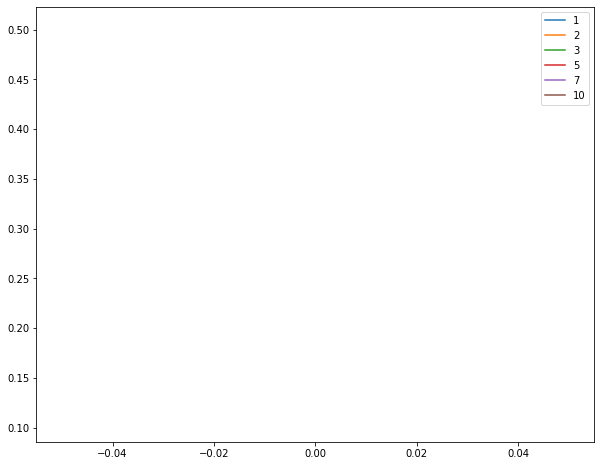

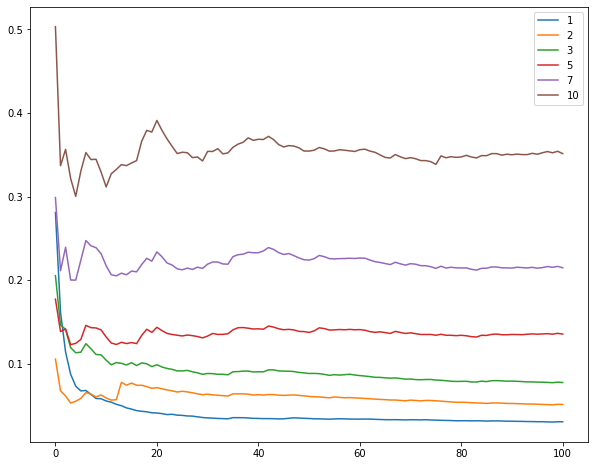

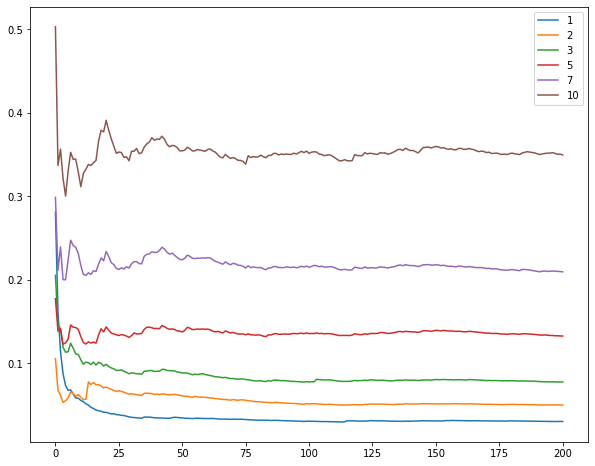

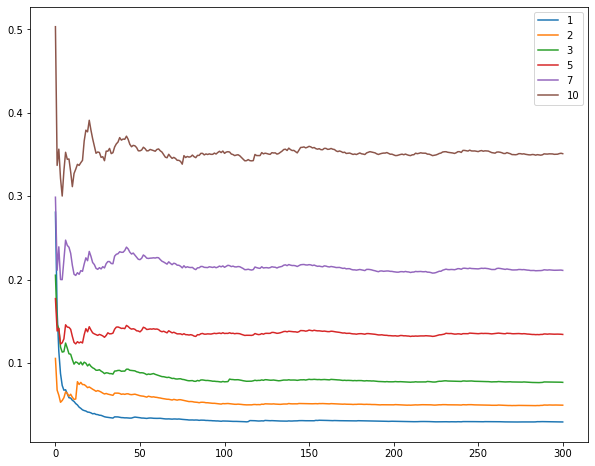

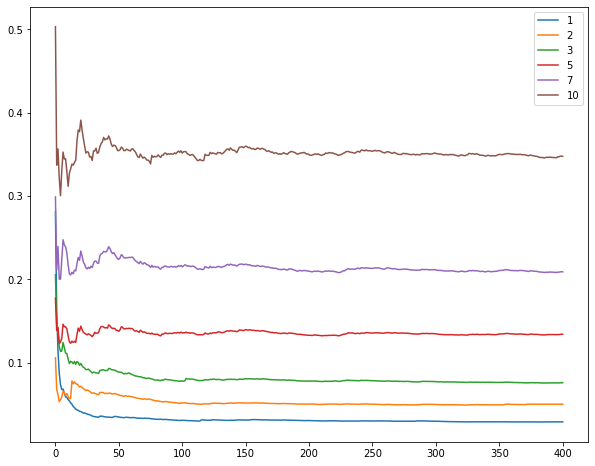

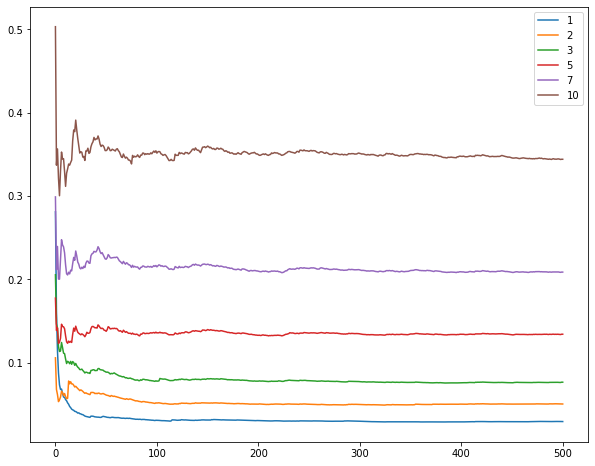

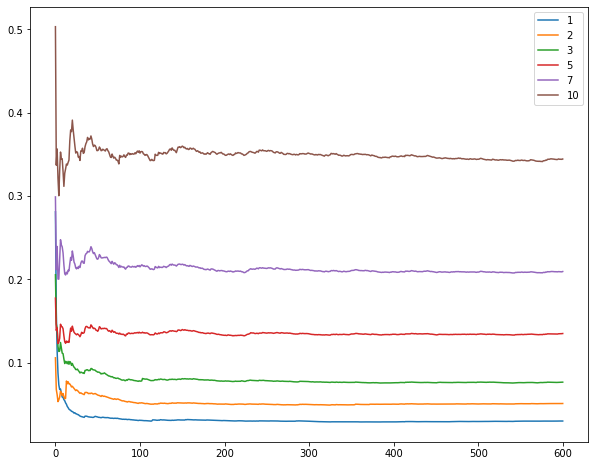

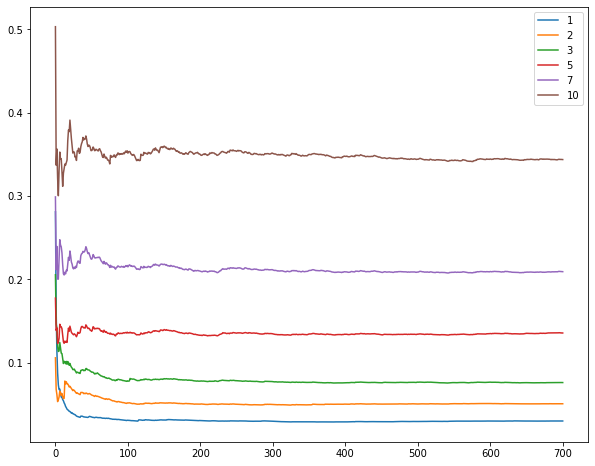

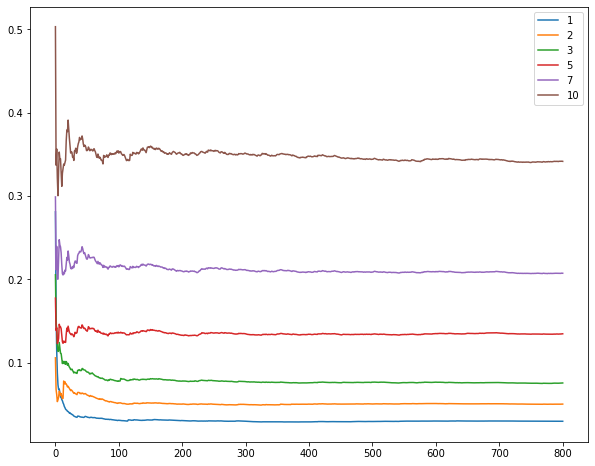

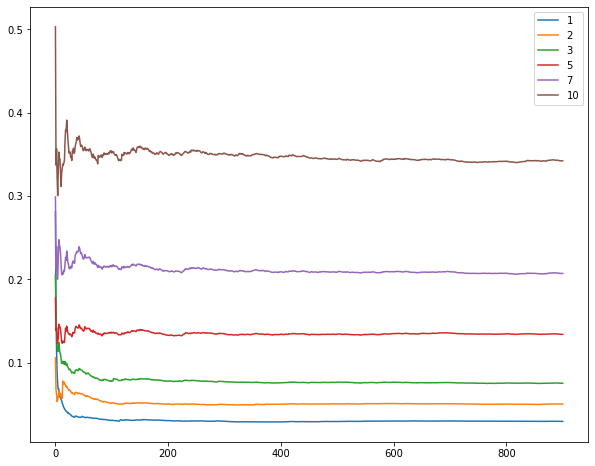

FINAL LOSS (forecast=zero-order, time_horizon=10)
1 : 0.02941440958163634
2 : 0.05074209438735902
3 : 0.07563071411281519
5 : 0.13363905348636826
7 : 0.20737171822571587
10 : 0.3419853070284363


In [128]:
all_loss = computeFirstOrderLoss(test_symbols, 10, [1, 2, 3, 5, 7, 10])

#### Time Horizon = 100, Test Horizons = (1, 5, 10, 25, 50, 75, 100)

  0%|          | 0/1000 [00:00<?, ?it/s]

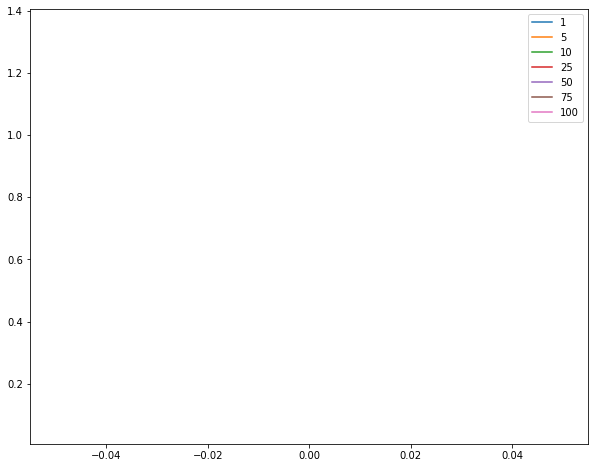

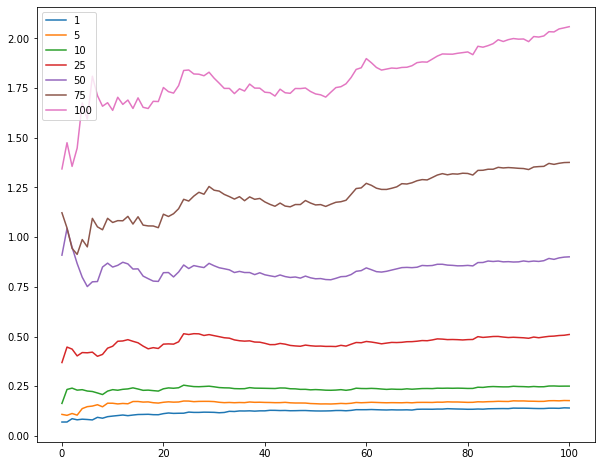

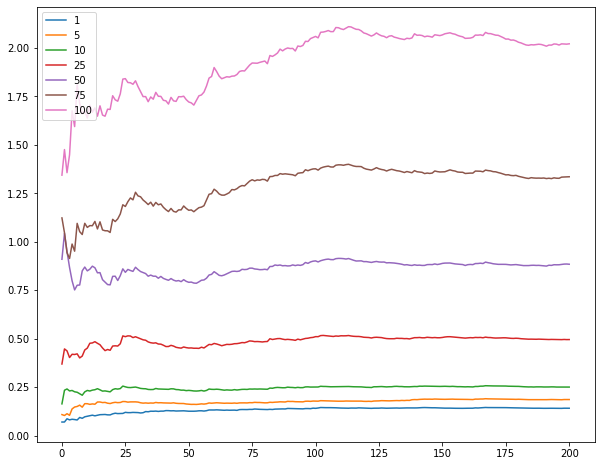

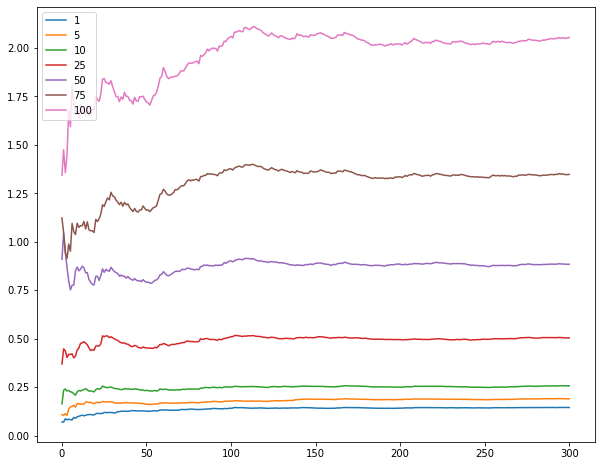

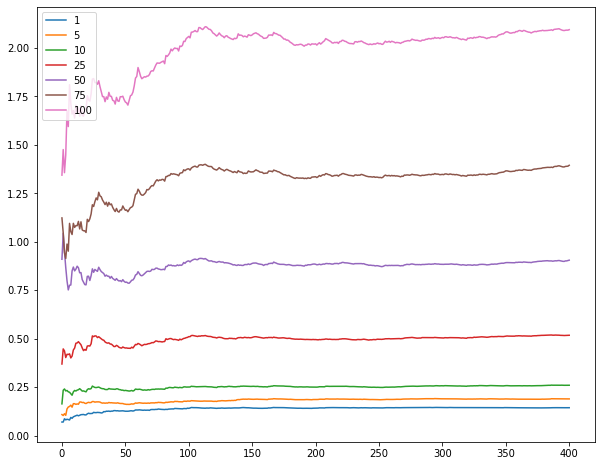

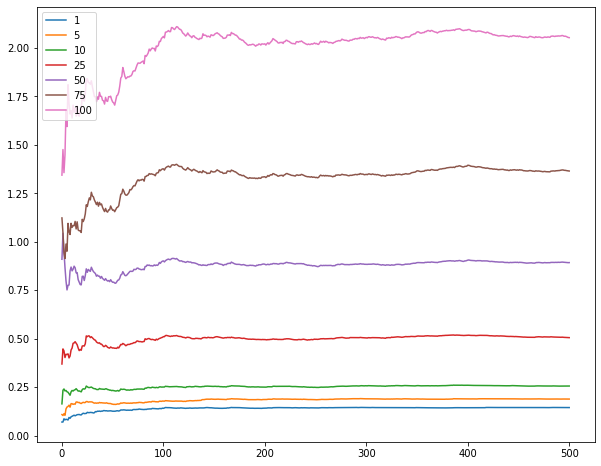

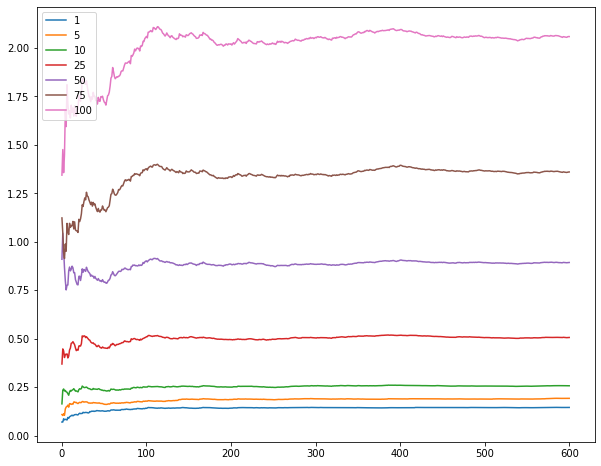

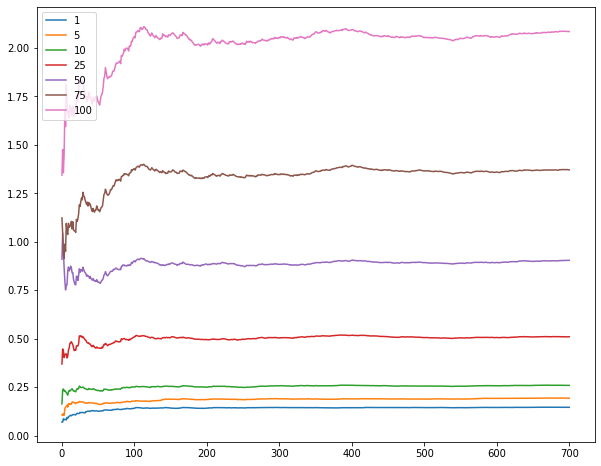

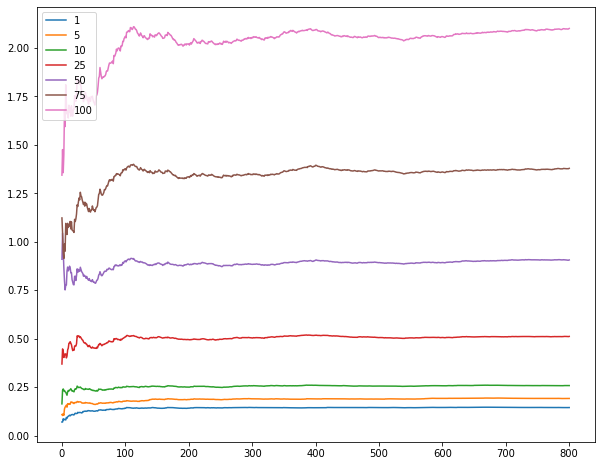

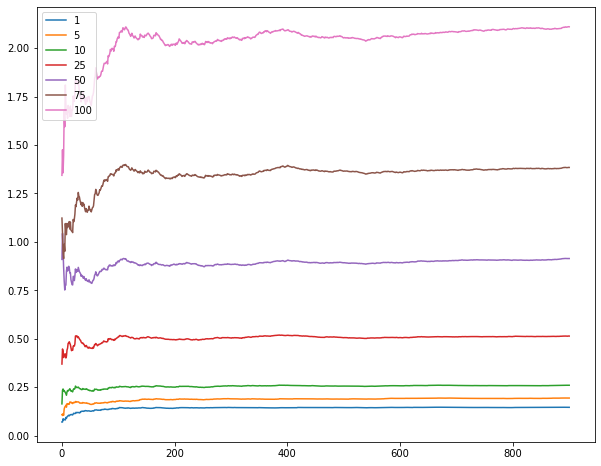

FINAL LOSS (forecast=zero-order, time_horizon=100)
1 : 0.144824509737815
5 : 0.1925388817685544
10 : 0.2586985071321631
25 : 0.5131608364243251
50 : 0.9104133241475035
75 : 1.3831261147736684
100 : 2.110534652269409


In [129]:
all_loss = computeFirstOrderLoss(test_symbols, 100, [1, 5, 10, 25, 50, 75, 100])

### Method 3: Exponential Moving Average 
(Tune on Validation --> one parameter per time horizon + test horizon combination)

In [130]:
def computeEMALoss(symbols, time_horizon, test_horizons):
    mean_loss = {test_horizon: list() for test_horizon in test_horizons}
    cumulative_mean = {test_horizon: list() for test_horizon in test_horizons}
    norm_var = np.array([var_map[symbol] for symbol in symbols])
    
    for test_step in tqdm(range(500)):
        (X_price, X_tweets, _), (Y_price, _) = sampleBatch(symbols, time_horizon)

        for test_horizon in test_horizons:
            actual_Y_price = Y_price[:, test_horizon - 1]
            
            pred_Y_price = EMAModel(X_price, time_horizon, test_horizon)
            
            loss = np.mean(((actual_Y_price - pred_Y_price) ** 2) / norm_var)
            mean_loss[test_horizon].append(loss)
            cumulative_mean[test_horizon].append(np.mean(mean_loss[test_horizon]))

        if (test_step % 100 == 0):
            plt.figure(figsize=(10, 8))
            for test_horizon in cumulative_mean:
                plt.plot(cumulative_mean[test_horizon], label=test_horizon)
            plt.legend()
            plt.show()
    
    print(f"FINAL LOSS (forecast=zero-order, time_horizon={time_horizon})")
    all_loss = dict()
    for test_horizon in mean_loss:
        all_loss[test_horizon] = np.mean(mean_loss[test_horizon])
        print(test_horizon, ":", all_loss[test_horizon])
    
    return all_loss

In [131]:
from scipy.stats import linregress

def EMAModel(X_price, time_horizon, test_horizon):
    alpha = alpha_map[(time_horizon, test_horizon)]
    mult2 = alpha * np.ones(time_horizon)
    mult2[0] = 1
    mult1 = (1 - alpha) ** np.flip(np.arange(0, time_horizon))
    pred = np.sum(X_price * mult1 * mult2, -1)
    return pred

#### Time Horizon = 10, Test Horizons = (1, 2, 3, 5, 7, 10)

In [132]:
alpha_map = dict()
alpha_map[(10, 1)] = 0.9
alpha_map[(10, 2)] = 0.85
alpha_map[(10, 3)] = 0.8
alpha_map[(10, 5)] = 0.75
alpha_map[(10, 7)] = 0.7
alpha_map[(10, 10)] = 0.5

  0%|          | 0/500 [00:00<?, ?it/s]

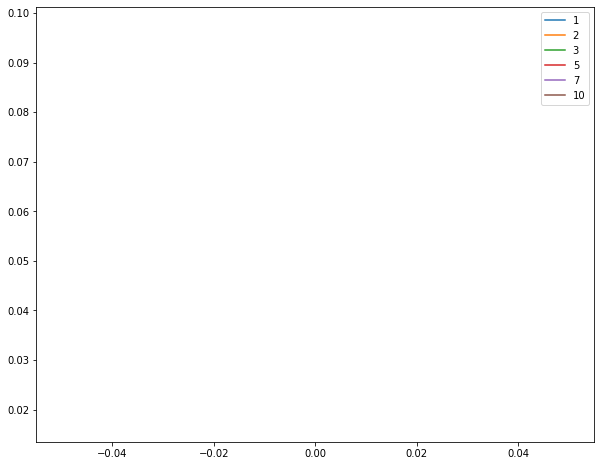

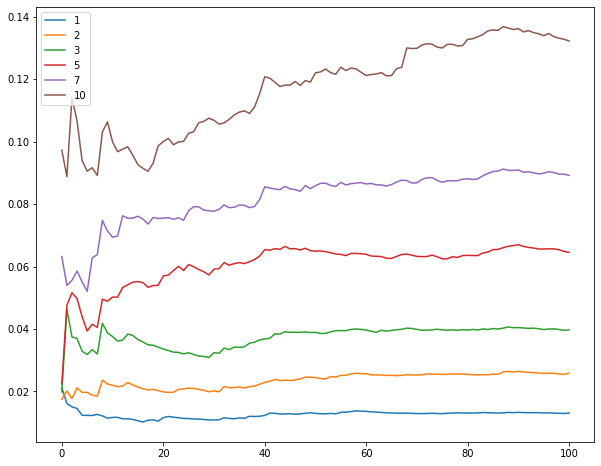

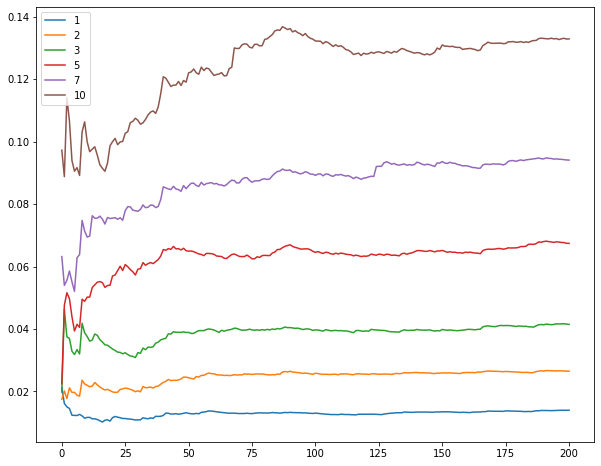

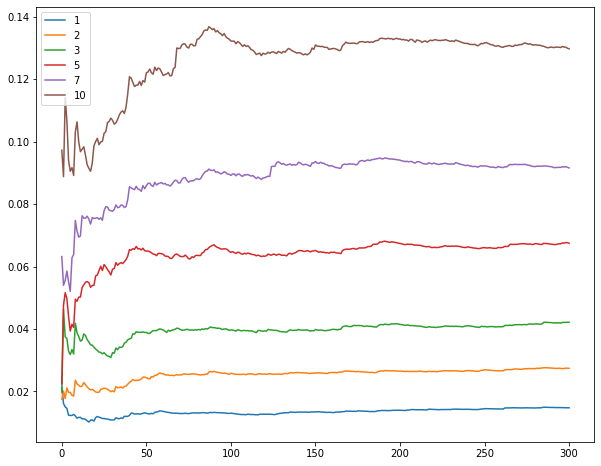

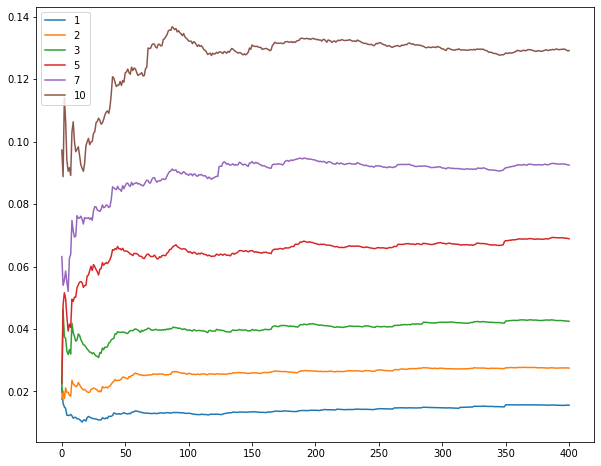

FINAL LOSS (forecast=zero-order, time_horizon=10)
1 : 0.015301883756875072
2 : 0.027273966678355112
3 : 0.04198507386285959
5 : 0.06784757102369053
7 : 0.09146089333444193
10 : 0.12841535371555926


In [133]:
all_loss = computeEMALoss(test_symbols, 10, [1, 2, 3, 5, 7, 10])

#### Time Horizon = 100, Test Horizons = (1, 5, 10, 25, 50, 75, 100)

In [134]:
alpha_map = dict()
alpha_map[(100, 1)] = 0.9
alpha_map[(100, 5)] = 0.85
alpha_map[(100, 10)] = 0.75
alpha_map[(100, 25)] = 0.5
alpha_map[(100, 50)] = 0.3
alpha_map[(100, 75)] = 0.25
alpha_map[(100, 100)] = 0.1

  0%|          | 0/500 [00:00<?, ?it/s]

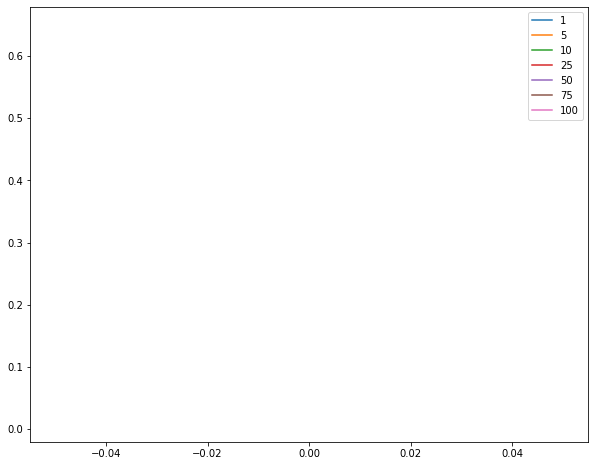

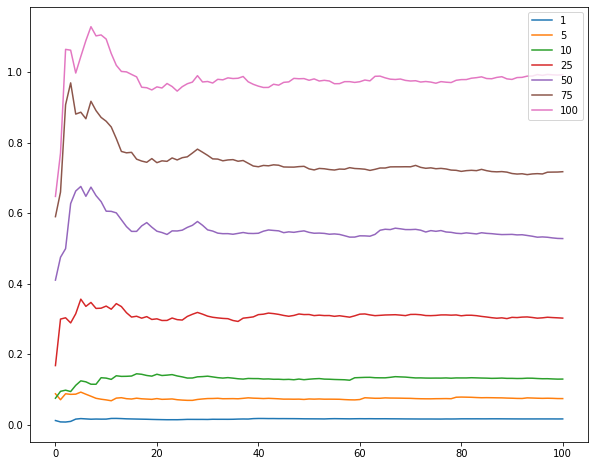

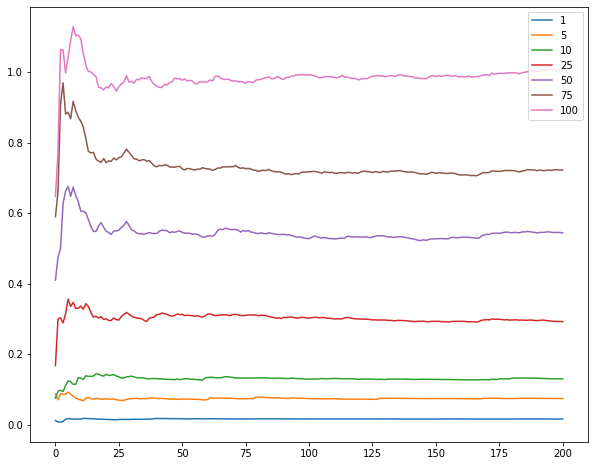

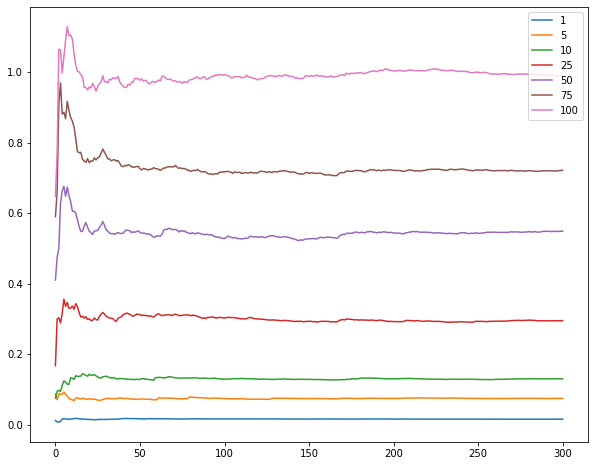

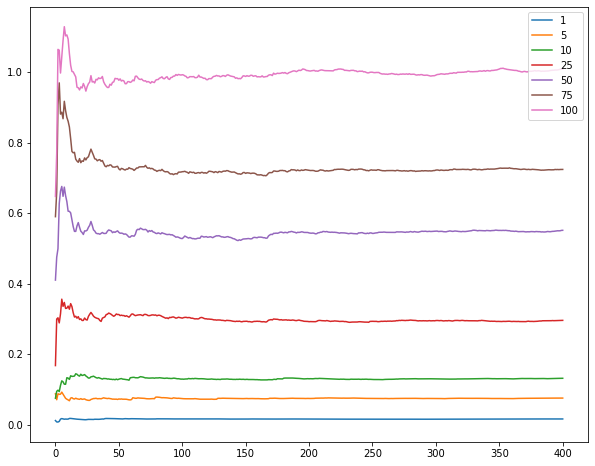

FINAL LOSS (forecast=zero-order, time_horizon=100)
1 : 0.015862992615266504
5 : 0.07368399646523185
10 : 0.1315394478760481
25 : 0.29582470261469823
50 : 0.5547215940520602
75 : 0.7224238090352476
100 : 0.9953658630585814


In [135]:
all_loss = computeEMALoss(test_symbols, 100, (1, 5, 10, 25, 50, 75, 100))